# LIBRARIES


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import GridSearchCV



# LOAD DATASET

In [2]:

#loading the dataset and spliting train-test data
X=pd.read_csv('..\\FinalDataSet.csv')
y=X['label']
X.drop(['id','label'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_test_e,X_eval,y_test_e,y_eval=train_test_split(X_test, y_test, test_size=0.50, random_state=42)

transformer=StandardScaler(with_mean=True,with_std=True).fit(X_train)

X_train_transform=transformer.transform(X_train)
X_test_transform=transformer.transform(X_test)
X_test_e_transform=transformer.transform(X_test_e)
X_eval_transform=transformer.transform(X_eval)



<p> در کد با گرفتن داده های ورودی از فایل ویژگی ها استخراج شده صورت گرفته است. 
پس از این عمل 
normalization 
بر روی داده ها صورت گرفته است.<p\>

# ONE VS REST LOGISTIC REGRESSION


              precision    recall  f1-score   support

         ney       0.92      0.72      0.81       116
       piano       0.86      0.97      0.91       101
     santour       0.86      0.71      0.78        93
       setar       0.75      0.79      0.77       106
         tar       0.66      0.86      0.74        78
      violin       0.77      0.75      0.76       102

    accuracy                           0.80       596
   macro avg       0.80      0.80      0.80       596
weighted avg       0.81      0.80      0.80       596

['ney' 'piano' 'santour' 'setar' 'tar' 'violin']
[0.72413793 0.97029703 0.70967742 0.79245283 0.85897436 0.75490196]


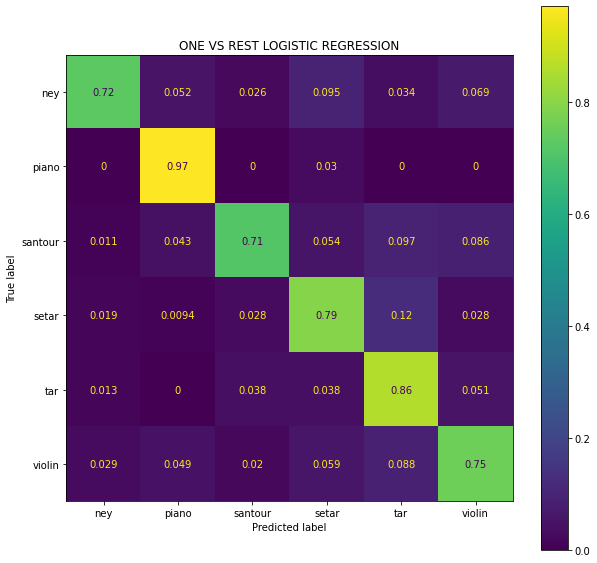

In [27]:
clf_ovr=OneVsRestClassifier(LogisticRegression(random_state=42)).fit(X_train_transform,y_train)

#prediction
preds_ovr=clf_ovr.predict(X_test_transform)

#classification report
print(classification_report(y_test,preds_ovr))

cm = confusion_matrix(y_test,preds_ovr)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("ONE VS REST LOGISTIC REGRESSION")
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_ovr.classes_).plot(ax=ax)

#classification accuracy for each instrument
print(clf_ovr.classes_)
print(cm.diagonal())

# kNN CLASSIFIER

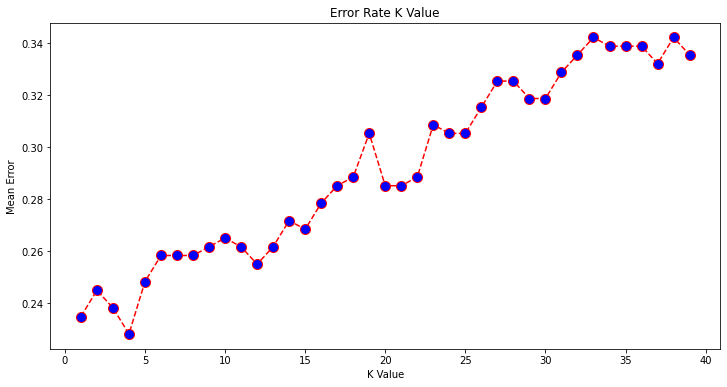

In [14]:

# evaluation
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_transform, y_train)
    pred_i = knn.predict(X_eval_transform)
    error.append(np.mean(pred_i != y_eval))


plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

## minimum error
index=np.argmin(error)
best_k=index+1


<p dir="rtl"> در بخش بالا 
parameter evaluation 
انجام گرفته است. بهترین 
k 
بدست آمده برابر است با k=4.
زیرا در آن میزان ارور حداقل بوده است.<p\> 

              precision    recall  f1-score   support

         ney       0.88      0.61      0.72        57
       piano       0.85      0.89      0.87        44
     santour       0.69      0.70      0.69        50
       setar       0.81      0.78      0.80        55
         tar       0.61      0.86      0.72        44
      violin       0.76      0.73      0.74        48

    accuracy                           0.76       298
   macro avg       0.77      0.76      0.76       298
weighted avg       0.77      0.76      0.76       298

['ney' 'piano' 'santour' 'setar' 'tar' 'violin']
[0.61403509 0.88636364 0.7        0.78181818 0.86363636 0.72916667]


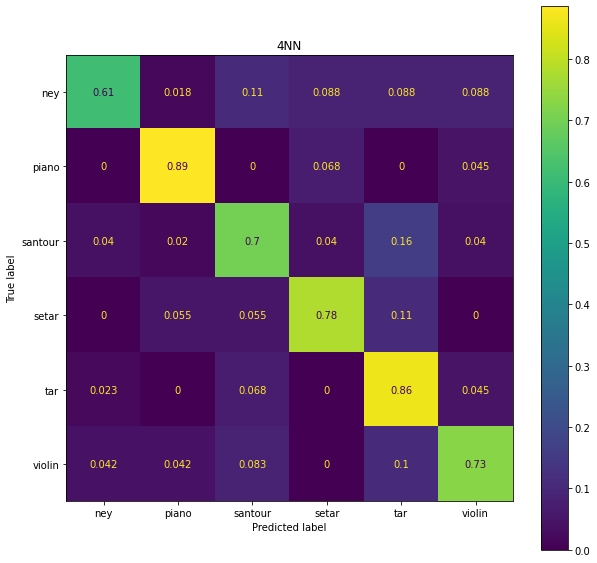

In [26]:
clf_KNN=KNeighborsClassifier(n_jobs=-1,n_neighbors=best_k,metric='euclidean',weights='distance').fit(X_train_transform,y_train)

#prediction
preds_KNN=clf_KNN.predict(X_test_e_transform)

#classification report
print(classification_report(y_test_e,preds_KNN))

cm = confusion_matrix(y_test_e,preds_KNN)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("{}".format(best_k)+"NN")
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_KNN.classes_).plot(ax=ax)
#classification accuracy for each instrument
print(clf_KNN.classes_)
print(cm.diagonal())

# GAUSSIAN NAIVE BASE

              precision    recall  f1-score   support

         ney       0.69      0.66      0.68       116
       piano       0.74      0.97      0.84       101
     santour       0.71      0.42      0.53        93
       setar       0.75      0.67      0.71       106
         tar       0.48      0.76      0.59        78
      violin       0.59      0.46      0.52       102

    accuracy                           0.66       596
   macro avg       0.66      0.66      0.64       596
weighted avg       0.67      0.66      0.65       596

['ney' 'piano' 'santour' 'setar' 'tar' 'violin']
[0.6637931  0.97029703 0.41935484 0.66981132 0.75641026 0.46078431]


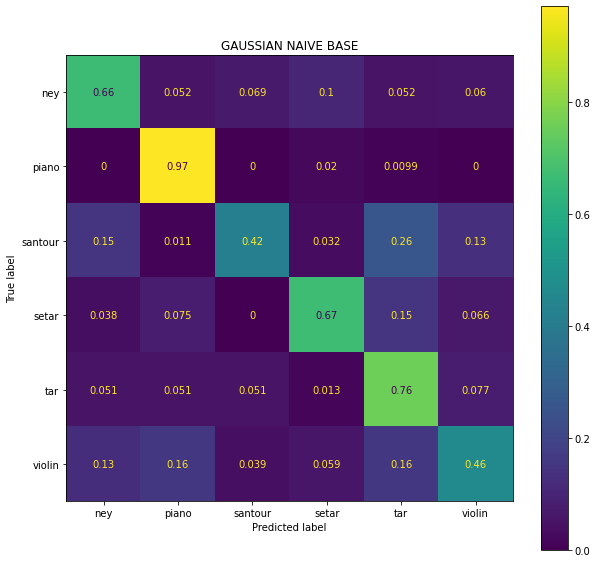

In [19]:
clf_NB=GaussianNB().fit(X_train_transform,y_train)
#prediction
preds_NB=clf_NB.predict(X_test_transform)

#classification report
print(classification_report(y_test,preds_NB))

cm = confusion_matrix(y_test,preds_NB)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("GAUSSIAN NAIVE BASE")
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_NB.classes_).plot(ax=ax)
#classification accuracy for each instrument
print(clf_NB.classes_)
print(cm.diagonal())

# SVM


grid search

In [3]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4 ,1], "C": [0.1 , 1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [0.1 , 1, 10, 100, 1000]},
    {"kernel": ["poly"], "C": [0.1 , 1, 10, 100, 1000],"gamma": [1e-3, 1e-4,1, 10], "degree":[3]},
]
print("# Tuning hyper-parameters for accuracy")
clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="accuracy")
clf.fit(X_train_transform, y_train)
print("Best parameters set found on development set: \n")
print(clf.best_params_)
print("\n Grid scores on development set:\n")
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print("\nDetailed classification report:\n")
print("The model is trained on the full development set.")
print("\nThe scores are computed on the full evaluation set.\n")
y_true, y_pred = y_test, clf.predict(X_test_transform)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for accuracy
Best parameters set found on development set: 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

 Grid scores on development set:

0.220 (+/-0.115) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.220 (+/-0.115) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.193 (+/-0.060) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.667 (+/-0.028) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.220 (+/-0.115) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.433 (+/-0.025) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.793 (+/-0.024) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.664 (+/-0.041) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.462 (+/-0.016) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.814 (+/-0.036) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.781 (+/-0.023) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.462 (+/-0.016) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.815 (+/-0.016) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.801 (+

['ney' 'piano' 'santour' 'setar' 'tar' 'violin']
[0.80172414 0.96039604 0.79569892 0.76415094 0.83333333 0.7254902 ]


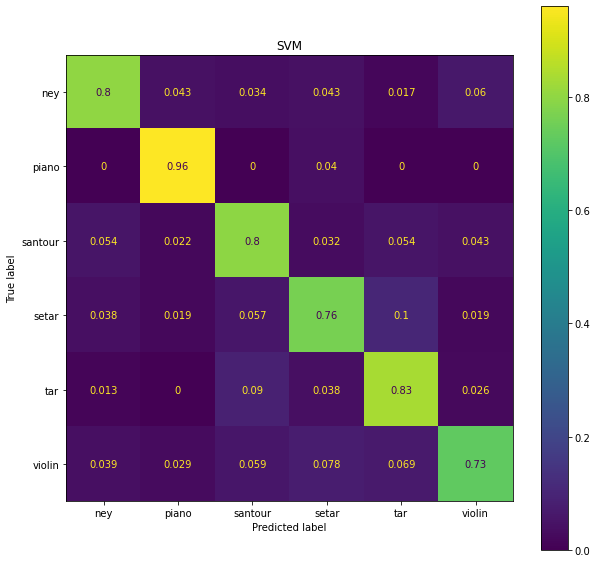

In [7]:
#classification report
cm = confusion_matrix(y_test,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("SVM")

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_).plot(ax=ax)
#classification accuracy for each instrument
print(clf.classes_)
print(cm.diagonal())


# MLP

C:\Users\SOHEIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         ney       0.93      0.81      0.87       116
       piano       0.88      0.96      0.92       101
     santour       0.84      0.82      0.83        93
       setar       0.81      0.80      0.81       106
         tar       0.74      0.87      0.80        78
      violin       0.85      0.81      0.83       102

    accuracy                           0.84       596
   macro avg       0.84      0.85      0.84       596
weighted avg       0.85      0.84      0.84       596

['ney' 'piano' 'santour' 'setar' 'tar' 'violin']
[0.81034483 0.96039604 0.8172043  0.80188679 0.87179487 0.81372549]


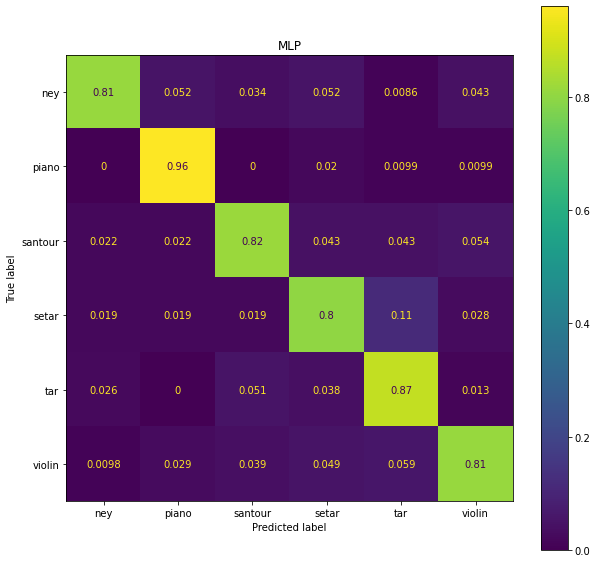

In [5]:
mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(256,128,64,32),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[100,200,300],
}
clf_MLP = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5).fit(X_train_transform, y_train)

#prediction
preds_MLP=clf_MLP.predict(X_test_transform)

#classification report
print(classification_report(y_test,preds_MLP))


cm = confusion_matrix(y_test,preds_MLP)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plt.title("MLP")
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_MLP.classes_).plot(ax=ax)
#classification accuracy for each instrument
print(clf_MLP.classes_)
print(cm.diagonal())

In [6]:
print(clf_MLP.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (256, 128, 64, 32), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'adam'}
